Importing the Required Libraries:

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

Reading the data:

In [4]:
data = pd.read_csv('plant_disease_dataset.csv')

data.head()

print("Dataset Shape: ", data.shape)


Dataset Shape:  (10000, 5)


Splitting the data into training and test sets:

In [5]:
X = data.values[:, 0:4]
Y = data.values[:, 4]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


Training the model:

In [6]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=10, min_samples_leaf=12)

clf_entropy.fit(X_train, y_train)


,criterion,'entropy'
,splitter,'best'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,12
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,100
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Testing the model, and checking results.

In [7]:
y_pred = clf_entropy.predict(X_test)
print("Predicted values:")
print(y_pred)


print("Accuracy Score: ", accuracy_score(y_test, y_pred))


Predicted values:
[0. 0. 1. ... 1. 0. 0.]
Accuracy Score:  0.8633333333333333


In [8]:
report_dict = classification_report(y_test, y_pred, output_dict=True)

df = pd.DataFrame(report_dict).transpose()
print(df)

              precision    recall  f1-score      support
0.0            0.881654  0.946790  0.913062  2274.000000
1.0            0.783154  0.601928  0.680685   726.000000
accuracy       0.863333  0.863333  0.863333     0.863333
macro avg      0.832404  0.774359  0.796874  3000.000000
weighted avg   0.857817  0.863333  0.856827  3000.000000


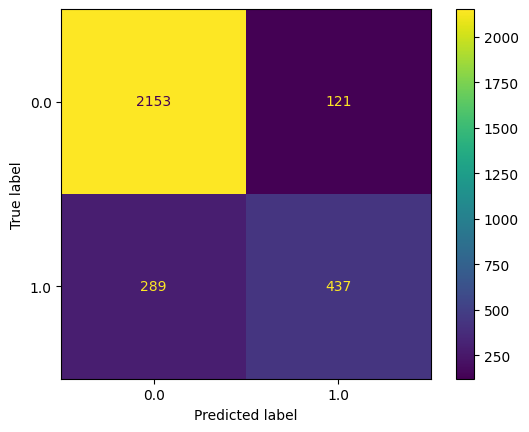

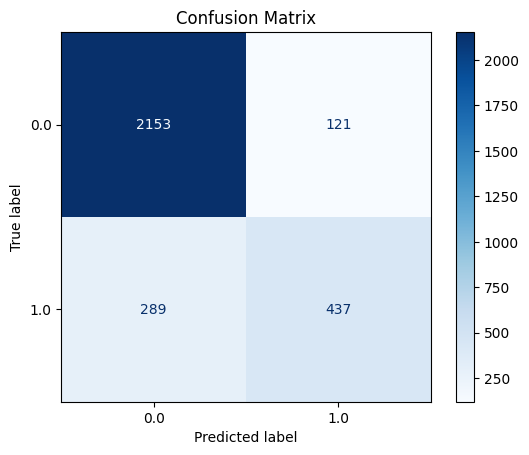

In [9]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [10]:
from sklearn.tree import plot_tree
def plot_decision_tree(clf_object, feature_names, class_names):
    plt.figure(figsize=(20, 12))
    plot_tree(clf_object, 
              filled=True, 
              feature_names=feature_names, 
              class_names=class_names, 
              rounded=True,
              fontsize=10)
    plt.title("Decision Tree Visualization")
    plt.show()


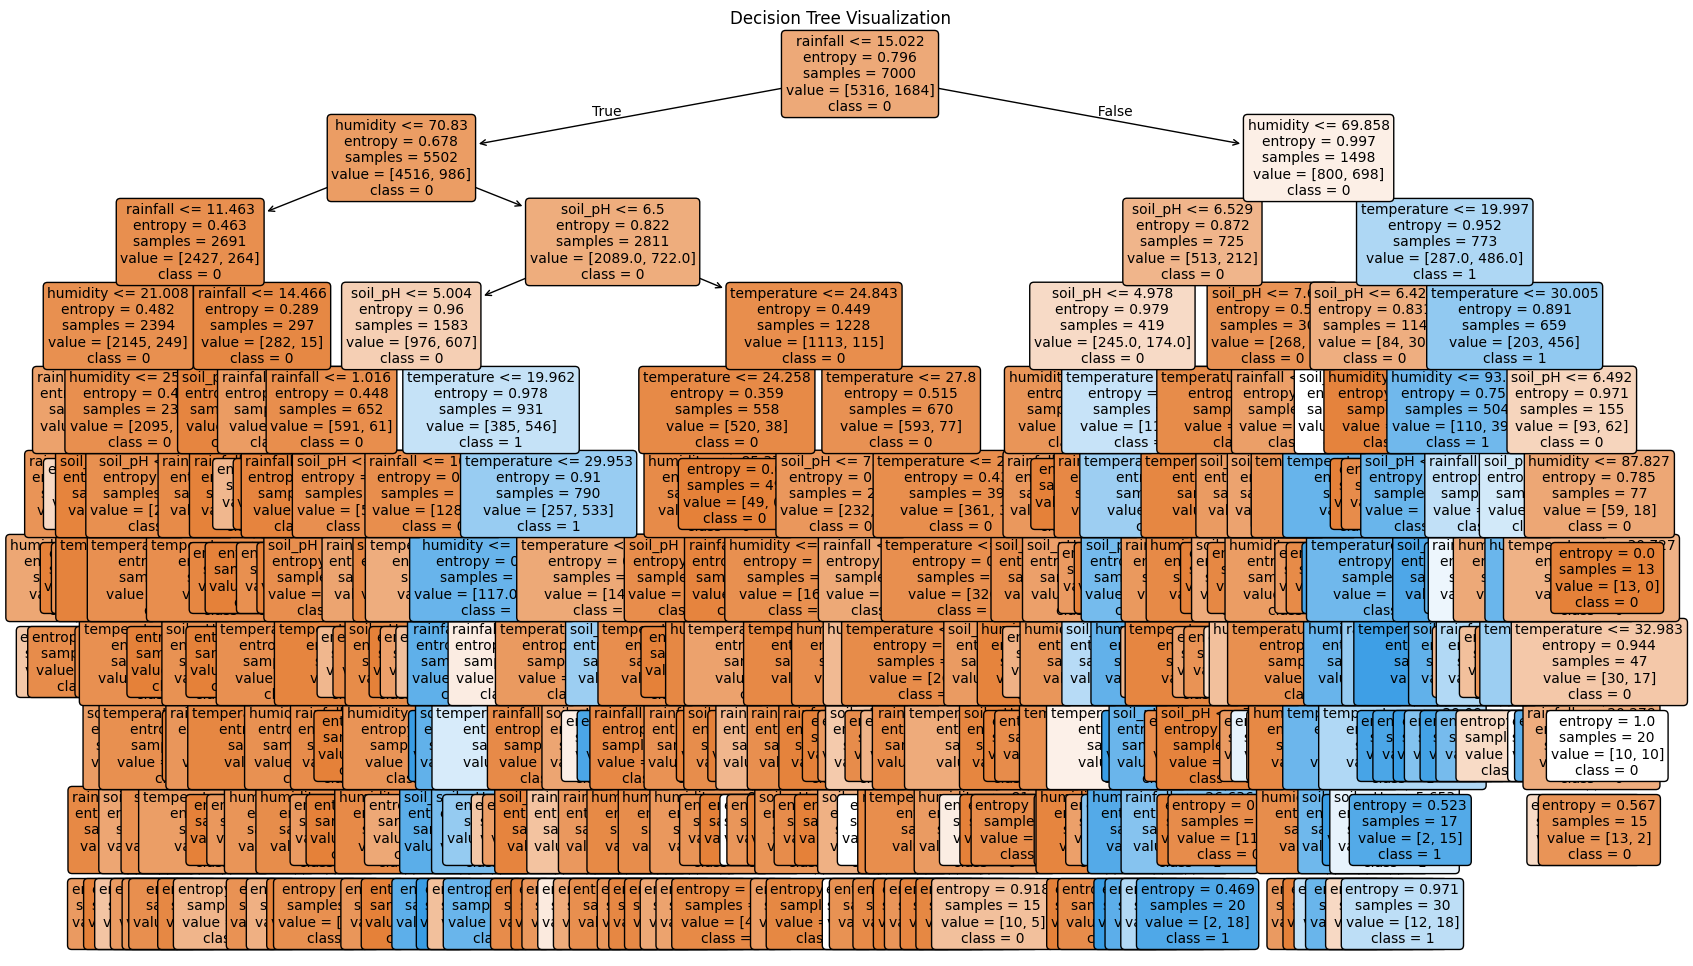

In [11]:
unique_classes = np.unique(Y)
class_names = [str(int(cls)) for cls in unique_classes]

plot_decision_tree(clf_entropy, ['temperature', 'humidity', 'rainfall', 'soil_pH'], class_names)

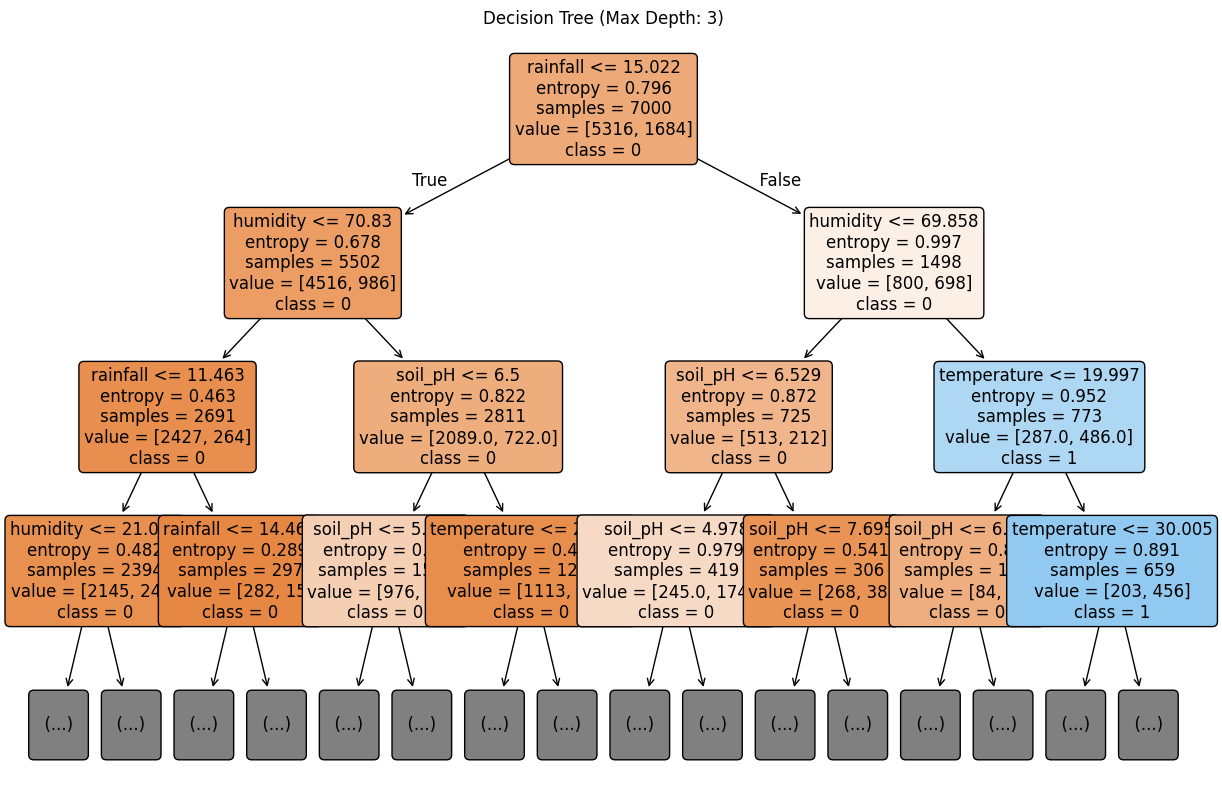

In [12]:
def plot_simple_tree(clf_object, feature_names, class_names, max_depth=3):
    plt.figure(figsize=(15, 10))
    plot_tree(clf_object, 
              filled=True, 
              feature_names=feature_names, 
              class_names=class_names, 
              rounded=True,
              fontsize=12,
              max_depth=max_depth)
    plt.title(f"Decision Tree (Max Depth: {max_depth})")
    plt.show()

    
plot_simple_tree(clf_entropy, ['temperature', 'humidity', 'rainfall', 'soil_pH'], class_names, max_depth=3)